In [1]:
import math as m
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [2]:
def raiz_newton_a(f , fp , x0 , err = 1e-8):
    d_raiz = 2*err
    contador = 0 
    while abs(f(x0)) >= err or d_raiz >= err:
        x_old = x0
        x0 = x0 - f(x0)/fp(x0)
        d_raiz = abs(x0 - x_old)
        contador += 1
        print(contador, '\t',x0, '\t' ,d_raiz )
    return x0

def raiz_newton_n(f , x0 , err = 1e-8 , h=1e-5):
    d_raiz = 2*err
    contador = 0 
    while abs(f(x0)) >= err or d_raiz >= err:
        x_old = x0
        fp = (f(x0+h)-f(x0-h))/(2*h)
        x0 = x0 - f(x0)/fp
        d_raiz = abs(x0 - x_old)
        contador += 1
        print(contador, '\t',x0, '\t' ,d_raiz )
    return x0

In [3]:
def mi_fun(x):
    return np.sin(x)/x

def deriv_mi_fun(x):
    return (x*np.cos(x) - np.sin(x))/x**2

In [4]:
raiz = raiz_newton_a(mi_fun,deriv_mi_fun,2)
print(raiz)
raiz = raiz_newton_n(mi_fun,2)
print(raiz)

1 	 3.044214599933897 	 1.044214599933897
2 	 3.1388643666227196 	 0.09464976668882263
3 	 3.1415902909919593 	 0.002725924369239685
4 	 3.1415926535880163 	 2.362596057015054e-06
5 	 3.141592653589793 	 1.7768009286101005e-12
3.141592653589793
1 	 3.0442145999380683 	 1.0442145999380683
2 	 3.1388643666230323 	 0.09464976668496394
3 	 3.1415902909919597 	 0.0027259243689274903
4 	 3.1415926535880163 	 2.3625960565709647e-06
5 	 3.141592653589793 	 1.7768009286101005e-12
3.141592653589793


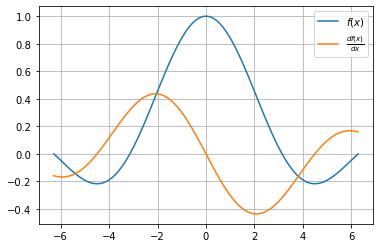

In [5]:
x = np.linspace(-2*np.pi,2*np.pi,100)
y = mi_fun(x)
dy = deriv_mi_fun(x)
plt.plot(x,y,label=r"$f(x)$")
plt.plot(x,dy,label=r"$\frac{df(x)}{dx}$")
plt.grid(),plt.legend()
plt.show()

In [6]:
def buscar_raiz(f,x_izq,x_der,err=1e-8):
    f_izq , f_med = f(x_izq) , 2*err
    d_raiz = 2*err
    contador = 0
    while abs(f_med) >= err or d_raiz >= err:
        x_med = 0.5*(x_izq+x_der)
        f_med = f(x_med)
        fifm = f_izq*f_med
        if fifm < 0:
            x_izq , x_der = x_izq , x_med
        else:
            x_izq , x_der = x_med , x_der
            f_izq = f_med
        contador +=1
        d_raiz = abs(x_izq-x_der)
        print(contador, '\t ',f_med,'\t ',d_raiz)
    return x_med

In [7]:
def mi_airy(x):
    return sp.airy(x)[0]

In [8]:
x0 = buscar_raiz(mi_airy,-3,-1)
x0

1 	  0.22740742820168564 	  1.0
2 	  -0.11232506769296623 	  0.5
3 	  0.0615986587770053 	  0.25
4 	  -0.025855656238569658 	  0.125
5 	  0.017951630456546457 	  0.0625
6 	  -0.0039565957042588425 	  0.03125
7 	  0.006999503022960282 	  0.015625
8 	  0.0015215619082015477 	  0.0078125
9 	  -0.001217538646571347 	  0.00390625
10 	  0.00015201230781351663 	  0.001953125
11 	  -0.0005327637636014588 	  0.0009765625
12 	  -0.00019037578096577513 	  0.00048828125
13 	  -1.918173791306612e-05 	  0.000244140625
14 	  6.64152861070919e-05 	  0.0001220703125
15 	  2.3616774199908337e-05 	  6.103515625e-05
16 	  2.217518145897393e-06 	  3.0517578125e-05
17 	  -8.482109885868885e-06 	  1.52587890625e-05
18 	  -3.1322958703601886e-06 	  7.62939453125e-06
19 	  -4.573888622253061e-07 	  3.814697265625e-06
20 	  8.800646418693707e-07 	  1.9073486328125e-06
21 	  2.1133788985691002e-07 	  9.5367431640625e-07
22 	  -1.2302548623008678e-07 	  4.76837158203125e-07
23 	  4.415620182469396e-08 	  2.384185

-2.3381074145436287

In [9]:
x0 = raiz_newton_n(mi_airy,-3)
x0

1 	 -1.7958237812355926 	 1.2041762187644074
2 	 -2.471553154863286 	 0.6757293736276933
3 	 -2.3361419975469877 	 0.13541115731629816
4 	 -2.3381074163731563 	 0.00196541882616863
5 	 -2.338107410459767 	 5.9133893337559584e-09


-2.338107410459767

In [21]:
def buscar_raiz(f,x_izq,x_der,err=1e-8):
    f_izq , f_med = f(x_izq) , 2*err
    d_raiz = 2*err
    while abs(f_med) >= err or d_raiz >= err:
        x_med = 0.5*(x_izq+x_der)
        f_med = f(x_med)
        fifm = f_izq*f_med
        if fifm < 0:
            x_izq , x_der = x_izq , x_med
        else:
            x_izq , x_der = x_med , x_der
            f_izq = f_med
        d_raiz = abs(x_izq-x_der)
    return x_med

def raiz_newton_a(f , fp , x0 , err = 1e-8):
    d_raiz = 2*err
    while abs(f(x0)) >= err or d_raiz >= err:
        x_old = x0
        x0 = x0 - f(x0)/fp(x0)
        d_raiz = abs(x0 - x_old)
    return x0

def raiz_newton_n(f , x0 , err = 1e-8 , h=1e-5):
    d_raiz = 2*err
    while abs(f(x0)) >= err or d_raiz >= err:
        x_old = x0
        fp = (f(x0+h)-f(x0-h))/(2*h)
        x0 = x0 - f(x0)/fp
        d_raiz = abs(x0 - x_old)
    return x0

In [22]:
%%timeit
x0 = buscar_raiz(mi_fun,2,4)

19.7 µs ± 70.8 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [23]:
%%timeit
x0 = raiz_newton_n(mi_fun,2)

13.9 µs ± 63.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [25]:
%%timeit
x0 = raiz_newton_a(mi_fun,deriv_mi_fun,2)

14.1 µs ± 44.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
